<a href="https://colab.research.google.com/github/linainsaf/image_audio_processing/blob/main/Audio_signal_Acqisition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import wave
import sys
import matplotlib.pyplot as plt
%run quantif.py 
from IPython.display import display, Audio
from scipy.io import wavfile

**I.Étude de la quantification**

1.Charger le signal audio

In [ ]:
samplerate, X = wavfile.read('sine440.wav')
X=X/(2**15)

(0.0, 0.01)

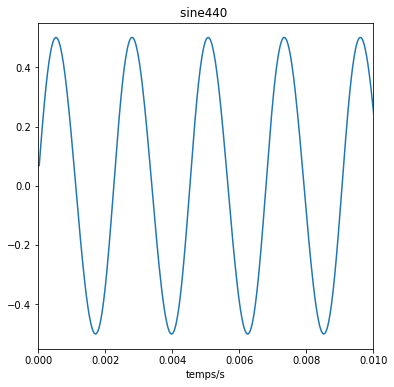

In [ ]:
plt.figure(figsize=(6,6))
t=np.arange(0,1,1/samplerate)
plt.plot(t,X)
plt.title("sine440 ")
plt.xlabel("temps/s")
plt.xlim(0,0.01)

2.Quantifier le signal audio

In [ ]:
N=4
A=1
y, q, Q=quantif(X, A, N)

(0.0, 0.01)

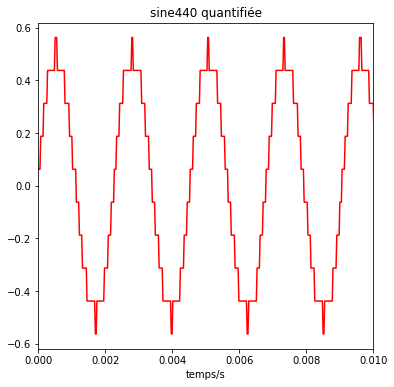

In [ ]:
plt.figure(figsize=(6,6))
t=np.arange(0,1,1/samplerate)
plt.plot(t,y,'r')
plt.title("sine440 quantifiée")
plt.xlabel("temps/s")
plt.xlim(0,0.01)

bruit de quantification

$\epsilon_q=x_q-x$

(0.0, 0.01)

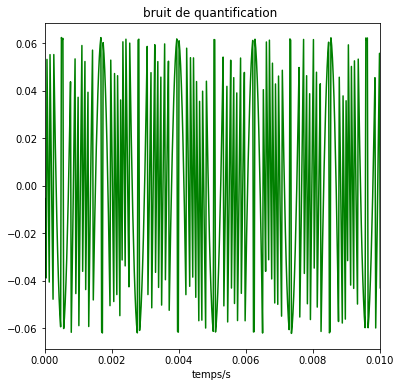

In [ ]:
ep=y-X
plt.figure(figsize=(6,6))
t=np.arange(0,1,1/samplerate)
plt.plot(t,ep,'g')
plt.title("bruit de quantification ")
plt.xlabel("temps/s")
plt.xlim(0,0.01)

3.Étudier les propriétés statistiques du bruit quantification

In [ ]:
#la valeur moyenne 
E=np.mean(ep)
print("le valeur moyenne du bruit quantification :",E)
#la variance 
v=np.var(ep)
print("le variance du bruit quantification :",v)
#loi de probabilité uniforme
p=1/q
print("loi de probabilité du bruit quantification :",p)

le valeur moyenne du bruit quantification : 2.763190237032313e-05
le variance du bruit quantification : 0.0015618846949353332
loi de probabilité du bruit quantification : 8.0


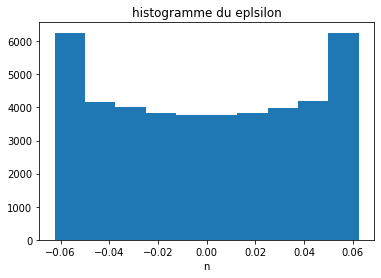

In [ ]:
plt.hist(ep) 
plt.xlabel("n")
plt.title("histogramme du eplsilon")
plt.show()

le valeur moyenne positive signifique une type d'arrondi par defaut

Comparé avec le resultat au hypothèse en cours (Nous considérrons la valeur moyenne nulle)

$\sigma_q^2=\frac{A^2}{3*2^{2N}}=\frac{1}{3*2^8}=0.001302$< le resultat exprimental=$0.0015618846949353332$

4.l'évolution du RSB pour différent N

In [ ]:
A=1
N=np.arange(0,50)
RSB_db=6*N+np.log10(3)-np.log10(A**2/np.var(X))

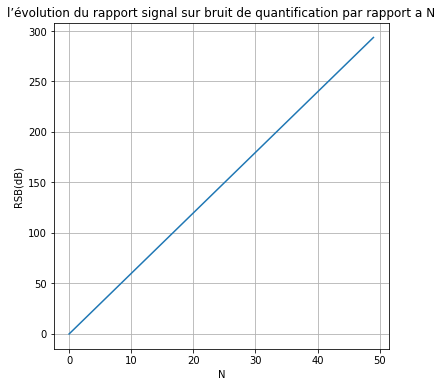

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(N,RSB_db)
plt.title("l’évolution du rapport signal sur bruit de quantification par rapport a N")
plt.xlabel("N")
plt.ylabel("RSB(dB)")
plt.grid()

Cette courbe est une courbe linéaire proportionnelle.La valeur de RSB(dB) augmente à mesure que N augmente, et le taux d'augementation est constant.

5.l'évolution du RSB pour différent A

In [ ]:
N=8
A=np.arange(10,40,10)
A

array([10, 20, 30])

In [ ]:
y1, q1, Q1=quantif(X, A[0], N)
y2, q2, Q2=quantif(X, A[1], N)
y3, q3, Q3=quantif(X, A[2], N)

(0.0, 0.003)

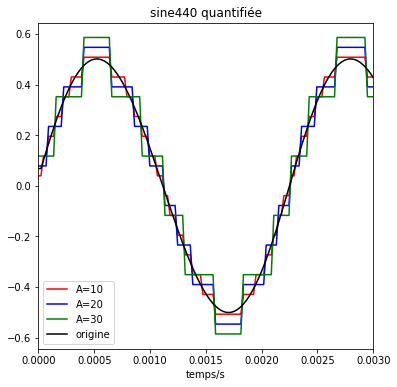

In [ ]:
plt.figure(figsize=(6,6))
t=np.arange(0,1,1/samplerate)
plt.plot(t,y1,'r',label='A=10')
plt.plot(t,y2,'b',label='A=20')
plt.plot(t,y3,'g',label='A=30')
plt.plot(t,X,'black',label='origine')

plt.title("sine440 quantifiée")
plt.xlabel("temps/s")
plt.legend(loc='best')
plt.xlim(0,0.003)

6.(a)l’évolution du rapport signal sur bruit de quantification en fonction de A

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


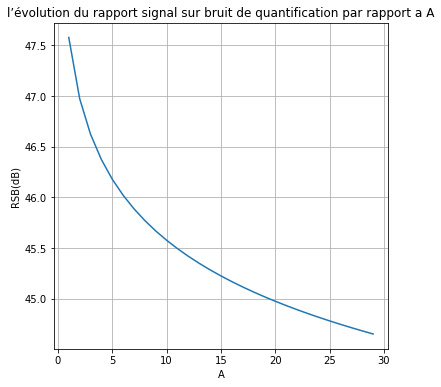

In [ ]:
N=8
A=np.arange(0,30)
RSB_db=6*N+np.log10(3)-np.log10(A**2/np.var(X))
#en fonction de A
plt.figure(figsize=(6,6))
plt.plot(A,RSB_db)
plt.title("l’évolution du rapport signal sur bruit de quantification par rapport a A")
plt.xlabel("A")
plt.ylabel("RSB(dB)")
plt.grid()

Cette courbe est une courbe proportionnelle inverse non linéaire. La valeur de RSB diminue à mesure que N augmente et le taux de diminution diminue également.

l’évolution du rapport signal sur bruit de quantification en fonction du facteur de charge en dB

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


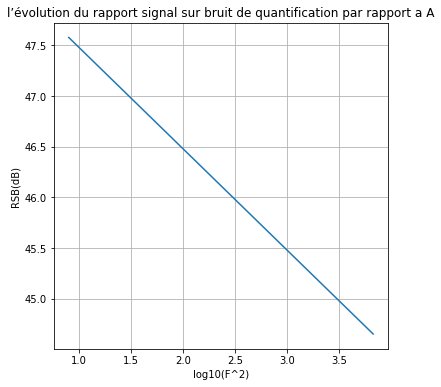

In [ ]:
#en fonction du facteur de charge en dB
F=A/np.std(X)
RSB_db=6*N+np.log10(3)-np.log10(F**2)
plt.figure(figsize=(6,6))
plt.plot(np.log10(F**2),RSB_db)
plt.title("l’évolution du rapport signal sur bruit de quantification par rapport a A")
plt.xlabel("log10(F^2)")
plt.ylabel("RSB(dB)")
plt.grid()

Cette courbe est une courbe linéaire proportionnelle inverse.La valeur de RSB(dB) diminue à mesure que N augmente, et le taux de diminuation est constant.

6.(b)l’évolution du rapport signal sur bruit de quantification en fonction du facteur de charge en dB avec différent N choisi

In [ ]:
N=[5,8,10]
A=np.arange(1,30)
F=A/np.mean(x)

RSB_db1=6*N[0]+np.log10(3)-np.log10(A**2/np.var(x))
RSB_db2=6*N[1]+np.log10(3)-np.log10(A**2/np.var(x))
RSB_db3=6*N[2]+np.log10(3)-np.log10(A**2/np.var(x))

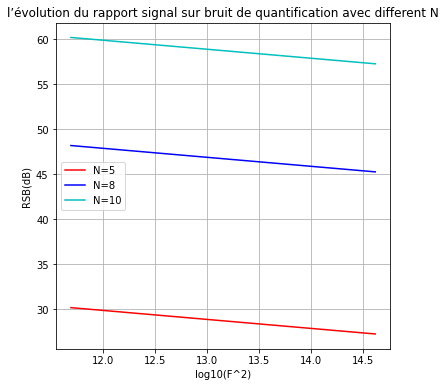

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(np.log10(F**2),RSB_db1,'r',label='N=5')
plt.plot(np.log10(F**2),RSB_db2,'b',label='N=8')
plt.plot(np.log10(F**2),RSB_db3,'c',label='N=10')
plt.title("l’évolution du rapport signal sur bruit de quantification avec different N")
plt.xlabel("log10(F^2)")
plt.ylabel("RSB(dB)")
plt.legend(loc='best')
plt.grid()

En choisissant différentes valeurs de N, nous obtenons trois courbes proportionnelles inverses linéaires parallèles. Cependant, plus la valeur de N est élevée, plus la valeur moyenne de la courbe est grande.

6.（c)Avec une pleine échelle trop faible 

In [ ]:
y1, q1, Q1=quantif(X, 0.5, 8)
v1=np.var(y1)
v11=np.var(y1-X)
print("la variance de x:",v1,"A=0.5","la variance de bruit:",v11)
y2, q1, Q1=quantif(X, 0.05, 8)
v2=np.var(y2)
v22=np.var(y2-X)
print("la variance de x:",v2,"A=0.05","la variance de bruit:",v22)
y3, q1, Q1=quantif(X, 1, 8)
v3=np.var(y3)
v33=np.var(y3-X)
print("la variance de x:",v3,"A=1","la variance de bruit:",v33)

la variance de x: 0.1260940300831659 A=0.5 la variance de bruit: 1.554232814137873e-06
la variance de x: 0.002377033761102968 A=0.05 la variance de bruit: 0.09677199231832695
la variance de x: 0.12629001046023214 A=1 la variance de bruit: 5.3286200234981795e-06


Si la valeur de A est trop petite, la variance de x est très petite par rapport à la variance de bruite, donc le signal sonore sera très bruite.

7.

In [ ]:
#ipd.Audio('voice.wav')#signal original
display(Audio('voice.wav'))

In [ ]:
samplerate2, X2 = wavfile.read('voice.wav')
X2=X2/(2**15)

In [ ]:
y2, q2, Q2=quantif(X2, 5, 2)
display(Audio(y2,rate=samplerate2))
print("la variance de x: ",np.var(y2),"la variance de bruit",np.var(y2-X2))

la variance de x:  1.5619111725201529 la variance de bruit 1.51013349331496


In [ ]:
y3, q3, Q3=quantif(X2, 5, 6)
display(Audio(y3,rate=samplerate2))
print("la variance de x: ",np.var(y3),"la variance de bruit",np.var(y3-X2))

la variance de x:  0.0061958470146698695 la variance de bruit 0.0039046512591113395


In [ ]:
y4, q4, Q4=quantif(X2, 5, 8)
display(Audio(y4,rate=samplerate2))
print("la variance de x: ",np.var(y4),"la variance de bruit",np.var(y4-X2))

la variance de x:  0.0013305246898220712 la variance de bruit 0.0001749624081530509


In [ ]:
y5, q5, Q5=quantif(X2, 5, 10)
display(Audio(y5,rate=samplerate2))
print("la variance de x: ",np.var(y5),"la variance de bruit",np.var(y5-X2))

la variance de x:  0.0011314665814788976 la variance de bruit 9.12013229404822e-06


quand on fix le valeur A=5,et varie le valeur N,on trouve que quand N égal au moins 8,le signal quentifiée est plus proche que le signal original.

**II Rééchantillonnage et repliement spectral**

*II.1 Rythmique*

1.charger le siganl rythmique.wav

In [ ]:
fe,xr=wavfile.read('rythmique.wav')
xr=xr/(2**15)
voice1=[]
voice0=[]
for i in xr:
  voice0.append(i[0])
  voice1.append(i[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  """Entry point for launching an IPython kernel.


2.afficher le signal rythmique.wav

Text(0.5, 0, 'temps/s')

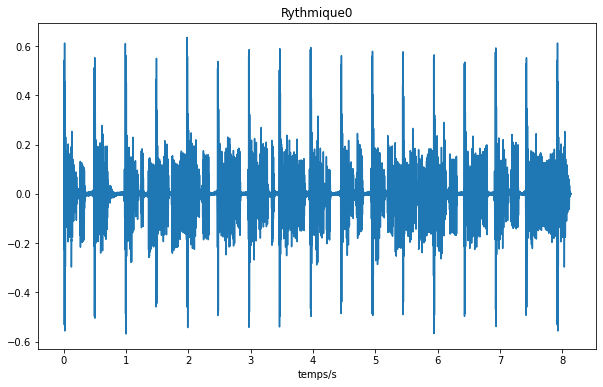

In [ ]:
t=np.arange(0,len(xr))/fe
plt.figure(figsize=(10,6))
plt.plot(t,voice0)
plt.title("Rythmique0")
plt.xlabel("temps/s")

Text(0.5, 0, 'temps/s')

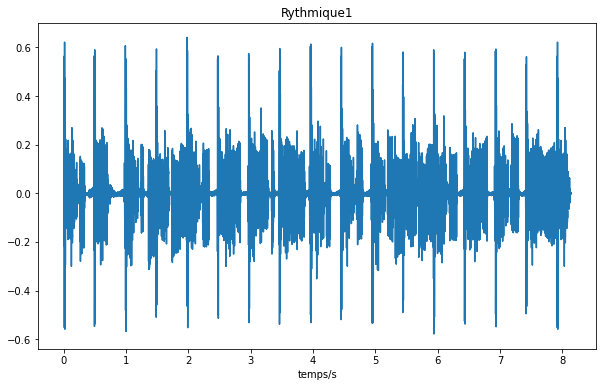

In [ ]:
t=np.arange(0,len(xr))/fe
plt.figure(figsize=(10,6))
plt.plot(t,voice1)
plt.title("Rythmique1")
plt.xlabel("temps/s")


3.calculer et afficher son spectre

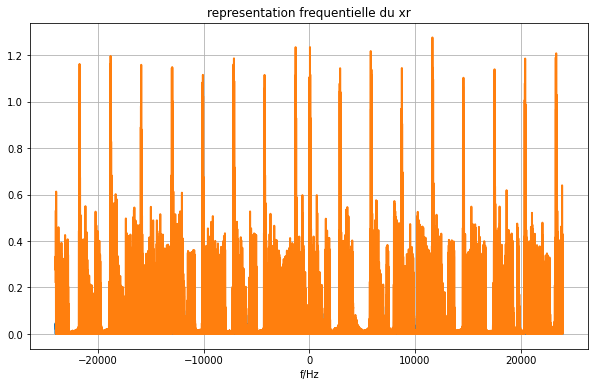

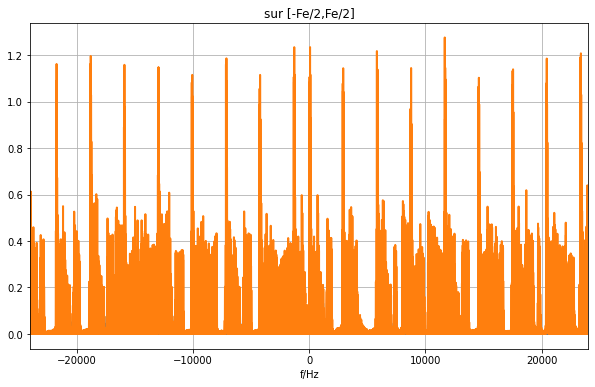

In [ ]:
NT= len(xr) 
f = np.fft.fftfreq(NT, 1/fe)

xf_f = np.fft.fft(xr)


plt.figure(figsize=(10,6))
# Tracé de la FFT de xr
plt.plot(np.fft.fftshift(f),abs(np.fft.fftshift(xf_f)), lw=2)
plt.title('representation frequentielle du xr')
plt.xlabel("f/Hz")
#plt.xlim((-lim,lim))
plt.grid()

plt.figure(figsize=(10,6))
# Tracé de la FFT de xr
plt.plot(np.fft.fftshift(f),abs(np.fft.fftshift(xf_f)), lw=2)
plt.title('sur [-Fe/2,Fe/2]')
plt.xlabel("f/Hz")
plt.xlim((-fe/2,fe/2))
plt.grid()

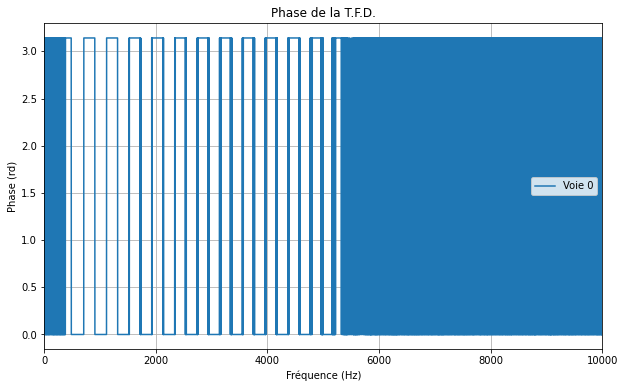

In [ ]:
# Tracer de la phase du spectre du signal temporel
voice1f_phase=np.fft.fftshift(np.angle((np.fft.fft(voice1)).real))
plt.figure(figsize=(10,6))
plt.plot(np.fft.fftshift(f),voice1f_phase, label="Voie 0")
plt.xlim(0,10000)
plt.title('Phase de la T.F.D.')
plt.legend()
plt.grid(True)
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Phase (rd)')
plt.show()
